## Nobel_laureates_Data_Analysis <p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>

1. **Find the top ten countries that have won the most Nobel Prizes.** 
2. **List the first women who won Nobel Prizes.**
3. **List the first men who won Nobel Prizes.**
4. ***Visualize from which year the country that has won the most Nobel Prizes has started to dominate and**
**what factors contributed to this dominance. Create insights?**
5. **Visualize the gender, ages, award categories, and years of Nobel Prize winners.**
**(Show separate graphs for each award category) Interpret the results based on the visuals.**
6. **Visualize and comment on the categories and countries of the Nobel Prize winners between 1938-1945.**
7. **Visualize and comment on the categories and countries of the Nobel Prize winners between 1947-1991.** 
**(A separate graph is required for each category)**
8. **Visualize the countries and ages of individuals in the categories of Chemistry, Literature, Peace, Physics**
**and Medicine who have won the Nobel Prize after 2000. (Separate visualizations are required for each category) Interpret the** **data.**

In [71]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [72]:
warnings.filterwarnings('ignore')
#ilgili csv dosyasının okutuyoruz

In [73]:
df=pd.read_csv('C:\\Users\\talha\\Downloads\\projep.csv')

In [74]:
df.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


In [75]:
df.info()#data type inspection and NaN test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [76]:
df['birth_date'] = pd.to_datetime(df['birth_date'])##we need to change it to datetime.
df['death_date'] = pd.to_datetime(df['death_date'], errors='coerce')
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [77]:
df['age']=df['year']-df['birth_date']##we need to find the age of every person at the time of the organisation year

df['age']=df['age']/ pd.Timedelta(days=365.25)

In [78]:
df['age'].isna().sum()  #seees like we have 28 NaN value in age column.

28

In [79]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    datetime64[ns]
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

In [80]:
##organization_country,birth_date ,sex,age we need these columns for our analysis so we need to fill up NaN VALUES to not lose important part of the data
df.isna().sum()  

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
age                      28
dtype: int64

In [81]:
##The reason of the NaN values in the organization_country individual individual nobel winners
ad = df[pd.isna(df['organization_country'])] 
ad

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,61.796030
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,72.648871
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,78.617385
7,1902-01-01,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany,84.084873
9,1902-01-01,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,68.862423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,2014-01-01,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaT,NaN,NaN,16.473648
893,2015-01-01,Literature,The Nobel Prize in Literature 2015,"""for her polyphonic writings, a monument to su...",1/1,924,Individual,Svetlana Alexievich,1948-05-31,Ivano-Frankivsk,Ukraine,Female,NaN,NaN,NaN,NaT,NaN,NaN,66.587269
897,2015-01-01,Peace,The Nobel Peace Prize 2015,"""for its decisive contribution to the building...",1/1,925,Organization,National Dialogue Quartet,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
905,2016-01-01,Literature,The Nobel Prize in Literature 2016,"""for having created new poetic expressions wit...",1/1,937,Individual,Bob Dylan,1941-05-24,"Duluth, MN",United States of America,Male,NaN,NaN,NaN,NaT,NaN,NaN,74.606434


In [82]:
#its reasonable to fill up this NaN values with the birth_country of the related nobel prize winner
ad[ad['laureate_type']=='Individual'].shape

(214, 19)

In [83]:
#"From this, we see that the missing organization_country values are actually international organizations. Without deleting them, we can label them as 'international'."
ad[ad['laureate_type']=='Organization']

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
24,1904-01-01,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
60,1910-01-01,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
89,1917-01-01,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
200,1938-01-01,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
215,1944-01-01,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
237,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
238,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
283,1954-01-01,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
348,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
349,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [84]:
#its reasonable to fill up this NaN values with the birth_country of the related nobel prize winner
df['organization_country'].fillna(df['birth_country'], inplace=True)  

In [85]:
df.isna().sum() #hala 26 adet NaN bulunmakta

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country     26
death_date              318
death_city              335
death_country           329
age                      28
dtype: int64

In [86]:
 #"From this, we see that the missing organization_country values are actually international organizations. Without deleting them, we can label them as 'international'."
df[pd.isna(df['organization_country'])] 

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
24,1904-01-01,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
60,1910-01-01,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
89,1917-01-01,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
200,1938-01-01,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
215,1944-01-01,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
237,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
238,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
283,1954-01-01,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
348,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
349,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [87]:
#We are filling in these missing values with 'International' because the organizations are mostly international."
df['organization_country'].fillna('International',inplace=True)

In [89]:
#We see that the sex column is generally left undefined for organizations; we can label these as 'neutral'."
sx=df[pd.isna(df['sex'])] 

In [90]:
sx

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
24,1904-01-01,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,NaN,NaN,NaN,International,NaT,NaN,NaN,NaN
60,1910-01-01,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,NaN,NaN,NaN,International,NaT,NaN,NaN,NaN
89,1917-01-01,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,International,NaT,NaN,NaN,NaN
200,1938-01-01,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,NaN,NaN,NaN,International,NaT,NaN,NaN,NaN
215,1944-01-01,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,International,NaT,NaN,NaN,NaN
237,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,International,NaT,NaN,NaN,NaN
238,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,International,NaT,NaN,NaN,NaN
283,1954-01-01,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,International,NaT,NaN,NaN,NaN
348,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,International,NaT,NaN,NaN,NaN
349,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,NaN,NaN,NaN,International,NaT,NaN,NaN,NaN


In [91]:
#We are filling in the parts without gender specification as 'Neutral' because these parts belong to international organizations."
df['sex'].fillna('Neutral', inplace=True)

In [92]:
#The birth_years of the organizations here should be given as the average age because the birth_date data that is NaT mostly belongs to organizations.
dd=df[pd.isna(df['birth_date'])]  

In [93]:
dd

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
24,1904-01-01,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
60,1910-01-01,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
89,1917-01-01,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
200,1938-01-01,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
215,1944-01-01,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
237,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
238,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
283,1954-01-01,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
348,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
349,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN


In [94]:
dd.shape

(28, 19)

In [95]:
df['age'].mean()

58.94128891379723

In [96]:
#The average value of 58 was entered for the age of international organizations.
df['age'].fillna(58, inplace=True)   

In [97]:
dd

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
24,1904-01-01,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
60,1910-01-01,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
89,1917-01-01,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
200,1938-01-01,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
215,1944-01-01,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
237,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
238,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
283,1954-01-01,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
348,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN
349,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,Neutral,NaN,NaN,International,NaT,NaN,NaN,NaN


In [98]:
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                       0
organization_name       246
organization_city       244
organization_country      0
death_date              318
death_city              335
death_country           329
age                       0
dtype: int64

In [99]:
#We continue without any data loss and without deleting any rows
df.shape

(911, 19)

In [100]:
#We can delete unesed columns
df.drop(['death_date','death_city','organization_city','motivation','laureate_id'],axis=1,inplace=True)

# Top ten countries that have won the most Nobel Prizes

In [102]:
df_t10=df['organization_country'].value_counts().head(10).reset_index(name='count')
df_t10

,organization_country,count
0,United States of America,367
1,United Kingdom,100
2,France,56
3,Germany,52
4,Sweden,30
5,International,26
6,Switzerland,25
7,Federal Republic of Germany,23
8,Japan,19
9,Denmark,13


<Axes: xlabel='count', ylabel='organization_country'>

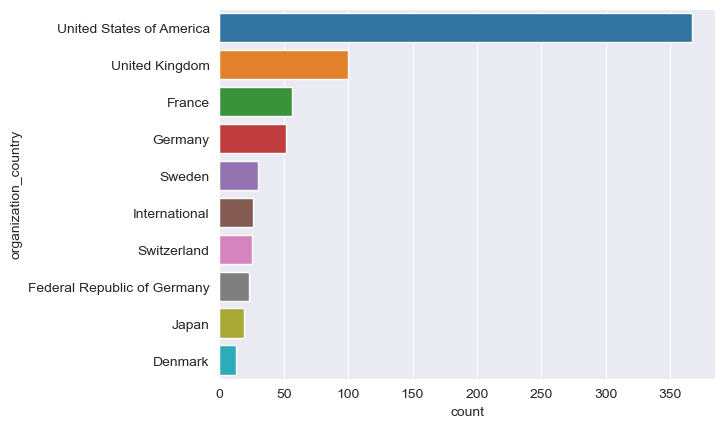

In [103]:
sns.barplot(df_t10,y='organization_country',x='count')

### According to the data obtained, the countries that have won the most Nobel Prizes are as follows:

1. **United States of America (USA)**: Leading with 367 awards.
   - This shows the USA's superior achievement in the scientific and cultural fields and its broad recognition
     by the Nobel Committee.

2. **United Kingdom**: In second place with 100 awards.
   - This reflects the long-standing contributions of the United Kingdom in science and literature.

3. **France**: In third place with 56 awards.
   - France's success in Nobel Prizes highlights its contributions, particularly in the fields of literature
     and science.

4. **Germany**: In fourth place with 52 awards.
   - This reveals Germany's significant role in scientific research and innovation.

5. **Sweden**: In fifth place with 30 awards.
   - Considering that the Nobel Prizes originated in Sweden, this achievement is quite meaningful.

6. **International**: 26 awards have been given to various international organizations.

7. **Switzerland**: In seventh place with 25 awards.
   - This demonstrates Switzerland's success in scientific research and neutrality.

8. **Federal Republic of Germany**: 23 awards, covering the achievements of Germany before reunification.

9. **Japan**: In ninth place with 19 awards.
   - This reflects Japan's contributions, especially in scientific research and innovation.

10. **Denmark**: In tenth place with 13 awards.
    - This shows Denmark's success, particularly in the fields of science and medicine.

These data provide important clues in understanding the contributions of countries to the Nobel Prizes and
the historical and geographical trends in the distribution of these awards. The high number of awards
indicates that the respective countries have produced globally recognized work in the fields of science,
literature, and peace.


# The first women who won Nobel Prizes.

In [105]:
df_f=df.loc[df['sex']=='Female',['full_name','year']].sort_values(by='year')  ##alternative=df.query('sex =="Female"')[['full_name','year']]
df_f.head(10)

,full_name,year
19,"Marie Curie, née Sklodowska",1903-01-01
29,"Baroness Bertha Sophie Felicita von Suttner, n...",1905-01-01
51,Selma Ottilia Lovisa Lagerlöf,1909-01-01
62,"Marie Curie, née Sklodowska",1911-01-01
128,Grazia Deledda,1926-01-01
141,Sigrid Undset,1928-01-01
160,Jane Addams,1931-01-01
179,Irène Joliot-Curie,1935-01-01
198,Pearl Buck,1938-01-01
218,Gabriela Mistral,1945-01-01


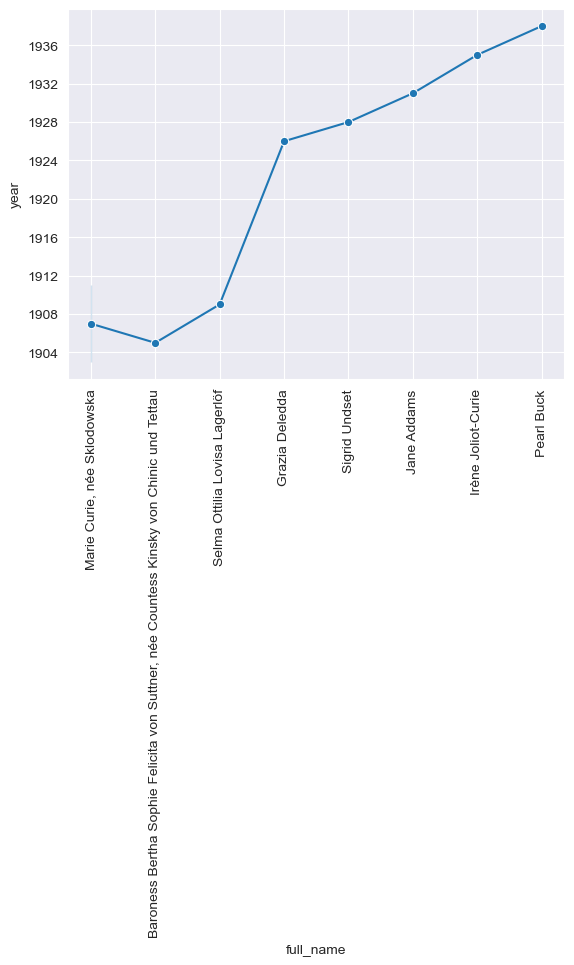

In [106]:
sns.set_style('darkgrid')
sns.lineplot(x='full_name',y='year',data=df_f.head(9),marker='o')
plt.xticks(rotation=90)
plt.show()

### The First Women to Win Nobel Prizes

Based on available data, the first women to win Nobel Prizes include **Marie Curie**, **Baroness Bertha Sophie Felicita von Suttner**, and **Selma Ottilia Lovisa Lagerlöf**.

- **Marie Curie**:
  - She is the first woman to win Nobel Prizes in both **Physics (1903)** and **Chemistry (1911)**.

- **Baroness Bertha Sophie Felicita von Suttner**:
  - She won the Nobel Prize in **Peace (1905)**, becoming the first woman in this field.

- **Selma Ottilia Lovisa Lagerlöf**:
  - She received the Nobel Prize in **Literature (1909)**.

The number of Nobel Prizes awarded to women throughout history is significantly lower compared to men. This is historically attributed to gender inequality and the insufficient recognition of women's contributions in fields such as science, peace, and literature.

- **Women in Scientific Fields**:
  - For instance, the rate of women winning Nobel Prizes in scientific fields like physics and chemistry is notably low. **Marie Curie** stands as a rare exception in this domain.

- **Peace Prizes**:
  - Regarding the Peace Prize, **Baroness Bertha Sophie Felicita von Suttner** was the first woman to win it. However, women's roles and efforts in peace processes are often overlooked.

- **Women in Literature**:
  - In literature, the number of Nobel Prizes awarded to female writers is lower compared to male writers. While some female writers like **Selma Ottilia Lovisa Lagerlöf** have achieved significant success in the literary world, women winning the Nobel Prize in literature remain a minority.

#### Women Nobel Laureates by Country

Nobel Prizes awarded to women are distributed among various countries:

- **Marie Curie**:
  - She was of Polish origin but was a French citizen and won both her Nobel Prizes in France.

- **Baroness Bertha Sophie Felicita von Suttner**:
  - Born in Austria, which was part of the Austro-Hungarian Empire, she won her prize in Austria.

- **Selma Ottilia Lovisa Lagerlöf**:
  - She was a Swedish writer and won her prize in Sweden.

In conclusion, although the number of Nobel Prizes awarded to women is relatively low, it's crucial to remember that these prizes represent significant achievements of women in various fields and countries. The contributions of women in science, peace, and literature require greater recognition and support.


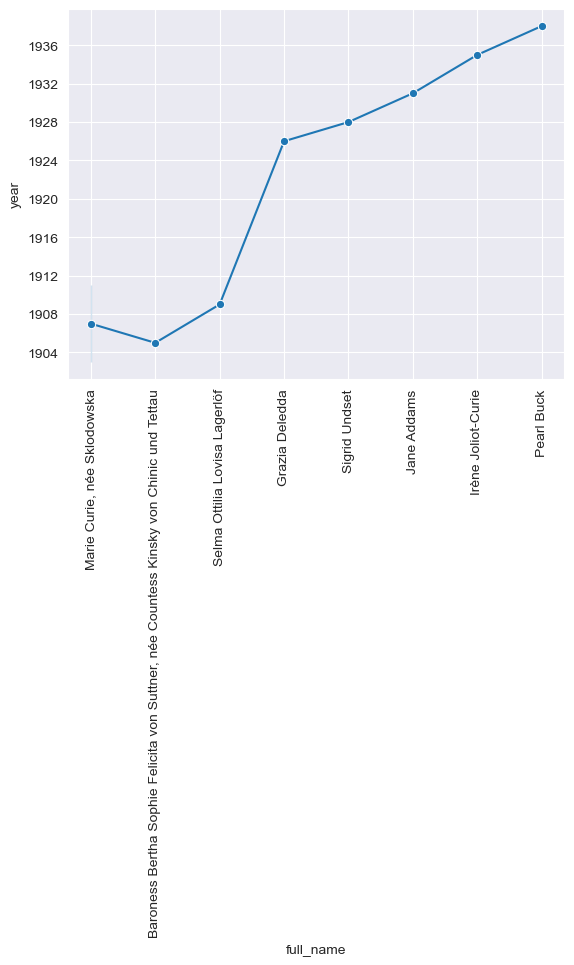

In [107]:
sns.set_style('darkgrid')
sns.lineplot(x='full_name',y='year',data=df_f.head(9),marker='o')
plt.xticks(rotation=90)
plt.show()

# The first men who won Nobel Prizes.

In [109]:
df.loc[df['sex']=='Male',['full_name','year']].head(10)

,full_name,year
0,Jacobus Henricus van 't Hoff,1901-01-01
1,Sully Prudhomme,1901-01-01
2,Emil Adolf von Behring,1901-01-01
3,Jean Henry Dunant,1901-01-01
4,Frédéric Passy,1901-01-01
5,Wilhelm Conrad Röntgen,1901-01-01
6,Hermann Emil Fischer,1902-01-01
7,Christian Matthias Theodor Mommsen,1902-01-01
8,Ronald Ross,1902-01-01
9,Élie Ducommun,1902-01-01


### The First Men to Win Nobel Prizes

Based on the available data, we can examine the first men to win Nobel Prizes, their respective categories and
their countries of origin.

- **Jacobus Henricus van 't Hoff**:
  - He is known as the first man to win the Nobel Prize in **Chemistry (1901)**. Van 't Hoff, a Dutch chemist,
    made significant contributions to the thermodynamics of chemistry.

- **Sully Prudhomme**:
  - As a French poet and literary figure, he was the first man to win the Nobel Prize in **Literature (1901)**. 
Prudhomme's literary works and poetry were deemed worthy of the award.

- **Emil Adolf von Behring**:
  - He was the first man to win the Nobel Prize in **Medicine (1901)** as a German bacteriologist and immunologist.
Behring's work on diphtheria treatment is considered a major advancement in the field of medicine.

- **Jean Henry Dunant**:
  - As a Swiss businessman and social activist, he was the first man to win the Nobel Prize in **Peace (1901)**. 
Dunant is the founder of the Red Cross and is known for his humanitarian efforts.

- **Frédéric Passy**:
  - He was the first man to win the Nobel Prize in **Peace (1901)** as a French economist and peace activist. 
Passy played a significant role in peace movements and advocated for international peace.

- **Wilhelm Conrad Röntgen**:
  - As a German physicist, he was the first man to win the Nobel Prize in **Physics (1901)**. Röntgen's discovery 
of X-rays had a revolutionary impact on the fields of medicine and science.

These men, coming from different countries and achieving significant accomplishments in various fields (chemistry, 
literature, medicine, peace, physics), highlight the diversity and global impact of Nobel Prizes. Their work has contributed
significantly to the scientific and cultural advancement of humanity.


# Let's find out from which year the country that has won the most Nobel Prizes has established its dominance

Text(0.5, 1.0, 'Countries Nobel Domination ')

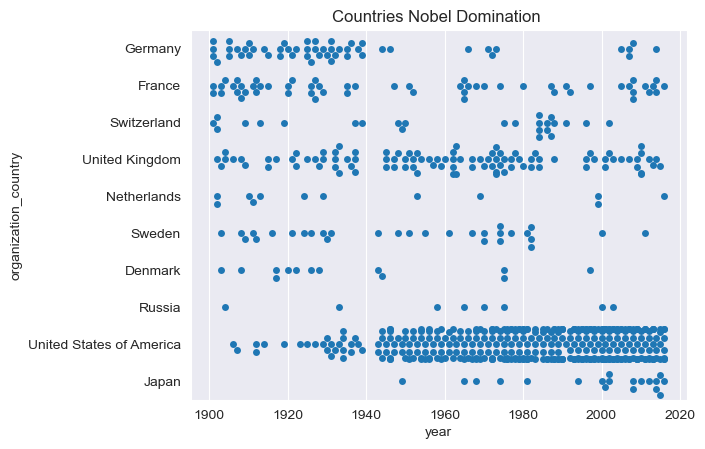

In [111]:
sns.swarmplot(data=df[df['organization_country'].isin(['United States of America','United Kingdom','Germany','France','Sweden','Netherlands','Japan','Denmark','Russia','Switzerland'])],x='year',y='organization_country')
plt.title('Countries Nobel Domination ')

In [112]:
country_year_count = df.groupby(['year', 'organization_country']).size().reset_index(name='count')

In [113]:
# Sum of Nobel winners yearly
dominant_country = country_year_count.loc[country_year_count.groupby('year')['count'].idxmax()]

In [114]:
dominant_country

,year,organization_country,count
1,1901-01-01,Germany,3
4,1902-01-01,Netherlands,2
9,1903-01-01,France,2
18,1904-01-01,United Kingdom,2
20,1905-01-01,Germany,3
...,...,...,...
505,2012-01-01,United States of America,5
511,2013-01-01,United States of America,8
519,2014-01-01,United States of America,3
526,2015-01-01,United States of America,4


<Axes: xlabel='year', ylabel='count'>

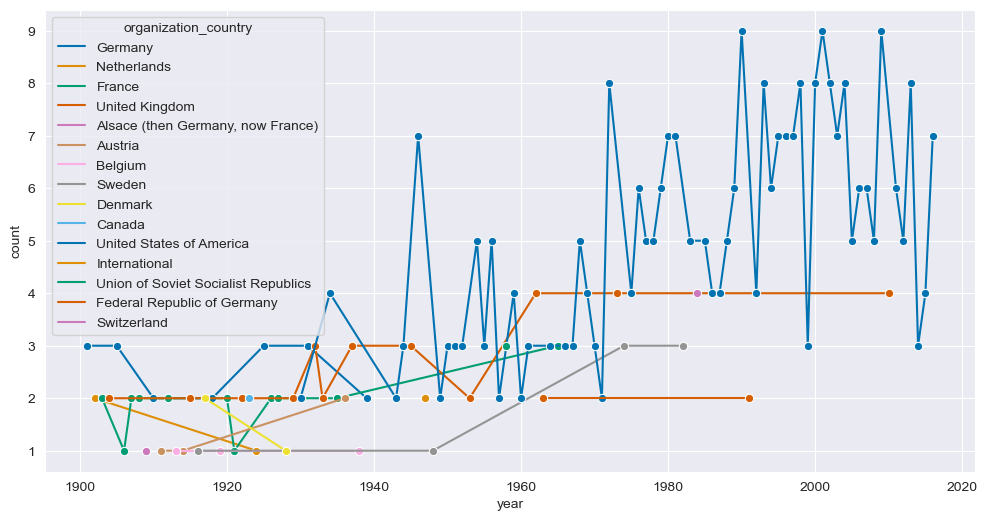

In [115]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dominant_country, x='year', y='count', hue='organization_country', marker='o',palette='colorblind')

### Nobel Prizes and Countries' Achievements

Based on the available data, we observe that the United States has received the most Nobel Prizes. The dominance of
the USA in Nobel Prizes became particularly prominent in the post-World War II period. Even during periods when the 
United States made significant scientific and economic advancements, such as the 1920s and 1930s, it was still lagging
behind other countries in terms of the number of Nobel Prizes awarded.

However, generally, the post-World War II period is considered a time when the United States assumed a global leadership 
role in science and technology. The post-World War II era, especially the migration of scientists and intellectuals from 
Europe to the United States, played a significant role in America's prominence in Nobel Prizes. Many scientists and
intellectuals living under Nazi Germany and other oppressive regimes immigrated to America in search of freedom and opportunity.

This wave of migration contributed to rapid growth and diversification in science and academia in America. Scientists from
Germany and other European countries played vital roles in universities and research institutions in America. They made 
significant contributions to American scientific progress, especially in fields like nuclear physics, space exploration, 
medicine, and engineering.

During this period, America's post-war economic recovery and significant investments in scientific research and development,
coupled with attracting scientists, may have contributed to the increase in Nobel Prize winnings.

Previously, countries like Germany, France, and the United Kingdom were more prominent in winning Nobel Prizes. Especially
Germany and France have produced many scientists and writers who made significant contributions to science and literature. 
However, major historical events like World War I and World War II may have affected the number of Nobel Prizes awarded to 
these countries.

# Let's visualize the genders, ages, award categories, and years of Nobel Prize winners

In [118]:
df_a5=df[['age','sex','category','year']]

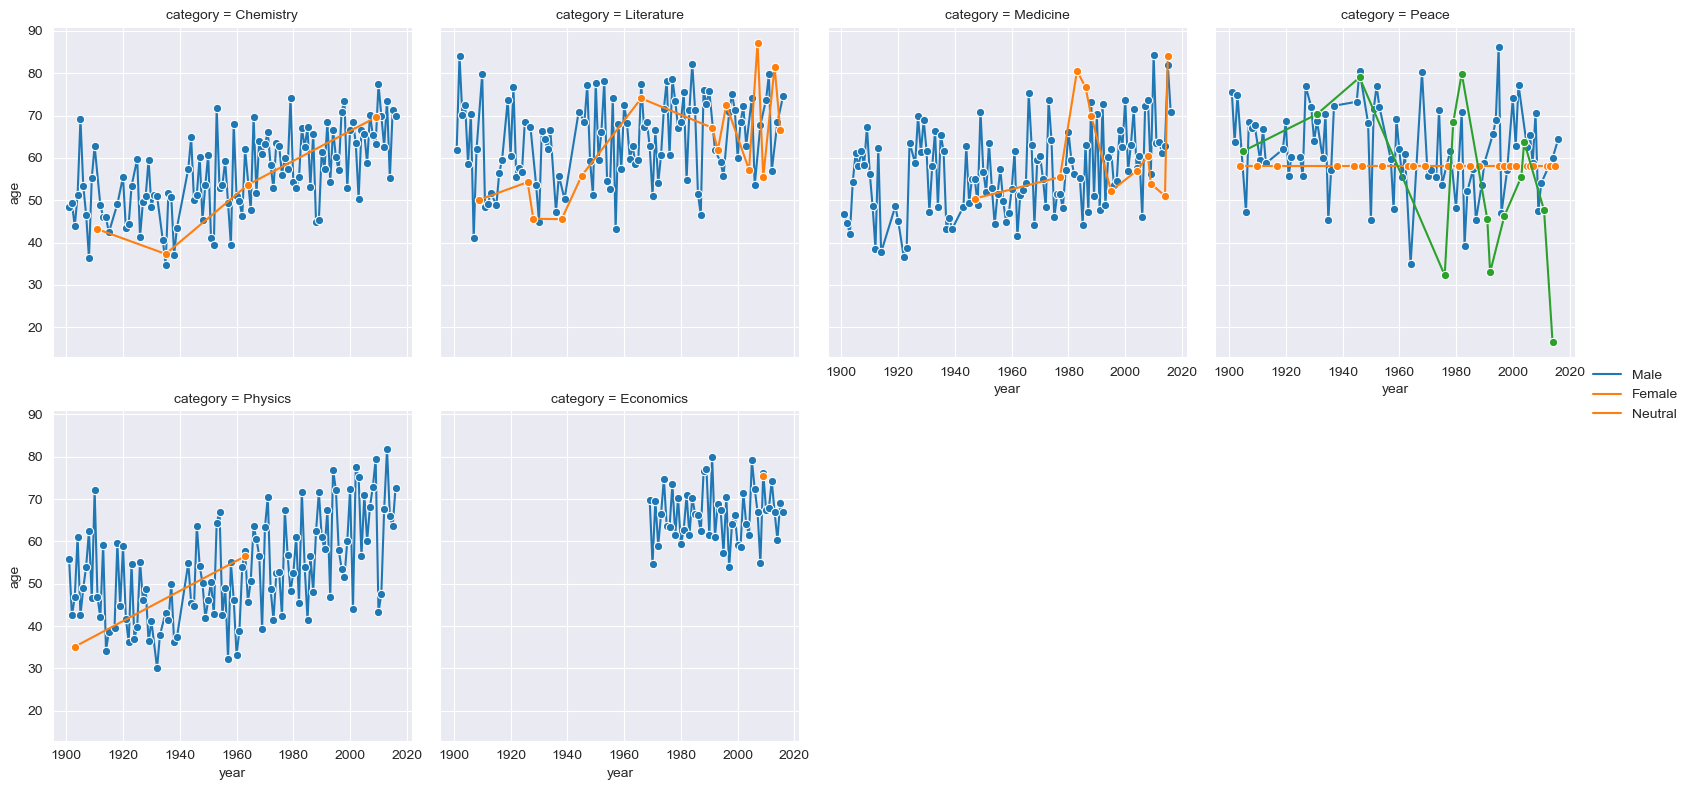

In [119]:
g = sns.FacetGrid(df_a5, col="category", col_wrap=4, height=4)
g.map_dataframe(sns.lineplot, x="year", y="age",hue='sex',ci=None,marker='o')
g.add_legend()

Text(0.5, 0, 'Sex')

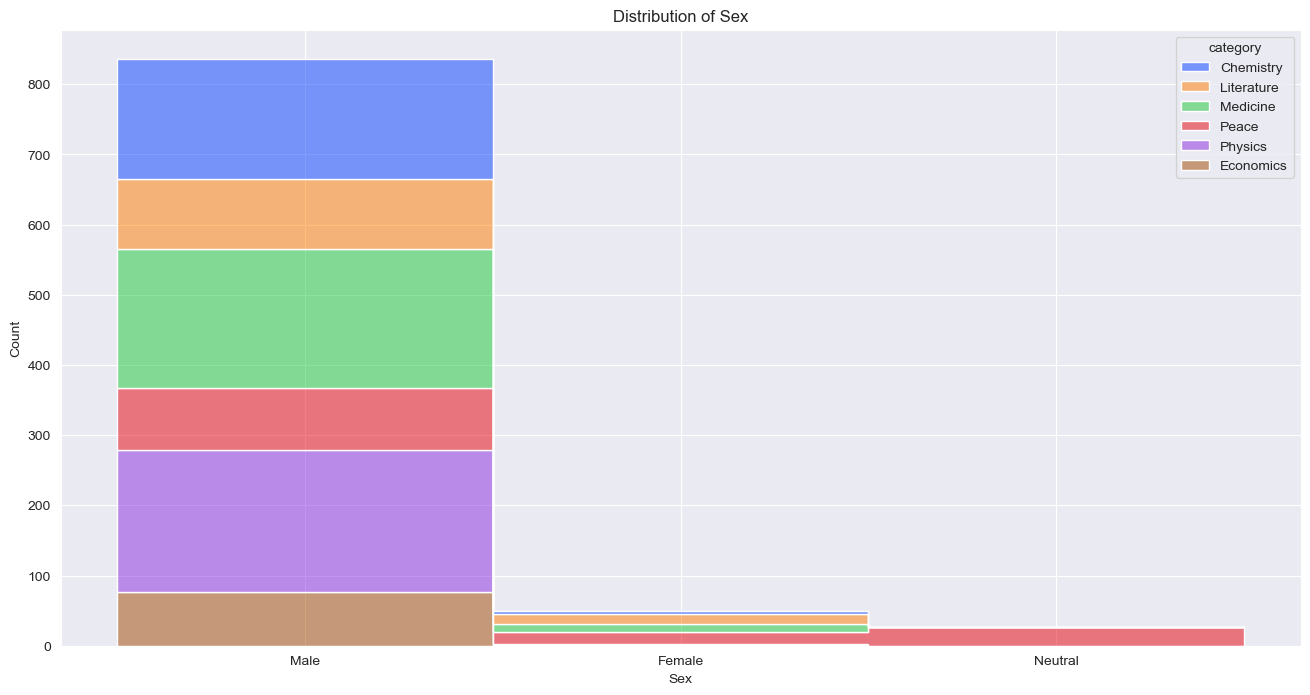

In [120]:
#lets find age distribution of sex 
plt.figure(figsize=(16,8))
sns.histplot(df_a5,x='sex',hue='category',palette='bright', alpha=0.5,linewidth=1, element='step', multiple='stack')
plt.title('Distribution of Sex')
plt.xlabel('Sex')

<Axes: xlabel='year', ylabel='age'>

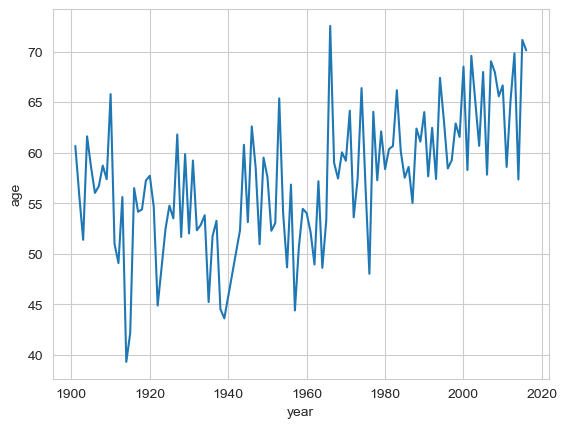

In [121]:
#lets find age distribution of sex by year
sns.set_style('whitegrid')
sns.lineplot(df_a5,x='year',y='age',ci=None)

### Nobel Prizes and Women's Achievements

Based on the available data, we see that women have been receiving awards more frequently in the fields of literature, 
peace, and medicine in recent years. Additionally, based on data as recent as 2016, we observe that there hasn't been a 
recent award for a woman in the field of physics.

### Nobel Prizes in Economics

We observe that Nobel Prizes in economics started to be awarded later compared to other categories (in 1969). The Nobel
Prize in Economics was established approximately 70 years after Alfred Nobel's death, and about a year after the establishment
of the Nobel Foundation in 1968. This award was created to honor significant contributions to economics made after Alfred Nobel's death.

### Nobel Prizes in Peace

Additionally, we observe that Nobel prizes are generally awarded to organizations, often in the field of peace.

### Age Range of Recipients

Furthermore, it is noteworthy that the age range of recipients is typically between 55 and 60 years old.


# Let's analyze the categories and countries of the Nobel Prize winners between 1938 and 1945

In [126]:
df1 = df[(df['year'].dt.year > 1938) & (df['year'].dt.year < 1945)]

In [127]:
df1

,year,category,prize,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_country,death_country,age
202,1939-01-01,Chemistry,The Nobel Prize in Chemistry 1939,1/2,Individual,Adolf Friedrich Johann Butenandt,1903-03-24,Bremerhaven-Lehe,Germany,Male,Kaiser-Wilhelm-Institut (now Max-Planck-Instit...,Germany,Germany,35.775496
203,1939-01-01,Chemistry,The Nobel Prize in Chemistry 1939,1/2,Individual,Leopold Ruzicka,1887-09-13,Vukovar,Austria-Hungary (Croatia),Male,Eidgenössische Technische Hochschule (Swiss Fe...,Switzerland,Switzerland,51.299110
204,1939-01-01,Literature,The Nobel Prize in Literature 1939,1/1,Individual,Frans Eemil Sillanpää,1888-09-16,Hämeenkyrö,Russian Empire (Finland),Male,NaN,Russian Empire (Finland),Finland,50.288843
205,1939-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1939,1/1,Individual,Gerhard Domagk,1895-10-30,Lagow,Germany (Poland),Male,Munster University,Germany,West Germany (Germany),43.170431
206,1939-01-01,Physics,The Nobel Prize in Physics 1939,1/1,Individual,Ernest Orlando Lawrence,1901-08-08,"Canton, SD",United States of America,Male,University of California,United States of America,United States of America,37.399042
207,1943-01-01,Chemistry,The Nobel Prize in Chemistry 1943,1/1,Individual,George de Hevesy,1885-08-01,Budapest,Austria-Hungary (Hungary),Male,Stockholm University,Sweden,West Germany (Germany),57.415469
208,1943-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1943,1/2,Individual,Henrik Carl Peter Dam,1895-02-21,Copenhagen,Denmark,Male,Polytechnic Institute,Denmark,Denmark,47.857632
209,1943-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1943,1/2,Individual,Edward Adelbert Doisy,1893-11-13,"Hume, IL",United States of America,Male,Saint Louis University,United States of America,United States of America,49.130732
210,1943-01-01,Physics,The Nobel Prize in Physics 1943,1/1,Individual,Otto Stern,1888-02-17,Sorau (Zory),Germany (Poland),Male,Carnegie Institute of Technology,United States of America,United States of America,54.869268
211,1944-01-01,Chemistry,The Nobel Prize in Chemistry 1944,1/1,Individual,Otto Hahn,1879-03-08,Frankfurt-on-the-Main,Germany,Male,Kaiser-Wilhelm-Institut (now Max-Planck Instit...,Germany,West Germany (Germany),64.815880


In [128]:
df1[['category','birth_country']].reset_index(inplace=True)

In [129]:
df1

,year,category,prize,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_country,death_country,age
202,1939-01-01,Chemistry,The Nobel Prize in Chemistry 1939,1/2,Individual,Adolf Friedrich Johann Butenandt,1903-03-24,Bremerhaven-Lehe,Germany,Male,Kaiser-Wilhelm-Institut (now Max-Planck-Instit...,Germany,Germany,35.775496
203,1939-01-01,Chemistry,The Nobel Prize in Chemistry 1939,1/2,Individual,Leopold Ruzicka,1887-09-13,Vukovar,Austria-Hungary (Croatia),Male,Eidgenössische Technische Hochschule (Swiss Fe...,Switzerland,Switzerland,51.299110
204,1939-01-01,Literature,The Nobel Prize in Literature 1939,1/1,Individual,Frans Eemil Sillanpää,1888-09-16,Hämeenkyrö,Russian Empire (Finland),Male,NaN,Russian Empire (Finland),Finland,50.288843
205,1939-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1939,1/1,Individual,Gerhard Domagk,1895-10-30,Lagow,Germany (Poland),Male,Munster University,Germany,West Germany (Germany),43.170431
206,1939-01-01,Physics,The Nobel Prize in Physics 1939,1/1,Individual,Ernest Orlando Lawrence,1901-08-08,"Canton, SD",United States of America,Male,University of California,United States of America,United States of America,37.399042
207,1943-01-01,Chemistry,The Nobel Prize in Chemistry 1943,1/1,Individual,George de Hevesy,1885-08-01,Budapest,Austria-Hungary (Hungary),Male,Stockholm University,Sweden,West Germany (Germany),57.415469
208,1943-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1943,1/2,Individual,Henrik Carl Peter Dam,1895-02-21,Copenhagen,Denmark,Male,Polytechnic Institute,Denmark,Denmark,47.857632
209,1943-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1943,1/2,Individual,Edward Adelbert Doisy,1893-11-13,"Hume, IL",United States of America,Male,Saint Louis University,United States of America,United States of America,49.130732
210,1943-01-01,Physics,The Nobel Prize in Physics 1943,1/1,Individual,Otto Stern,1888-02-17,Sorau (Zory),Germany (Poland),Male,Carnegie Institute of Technology,United States of America,United States of America,54.869268
211,1944-01-01,Chemistry,The Nobel Prize in Chemistry 1944,1/1,Individual,Otto Hahn,1879-03-08,Frankfurt-on-the-Main,Germany,Male,Kaiser-Wilhelm-Institut (now Max-Planck Instit...,Germany,West Germany (Germany),64.815880


Text(2119.7890667708334, 0.5, 'Country')

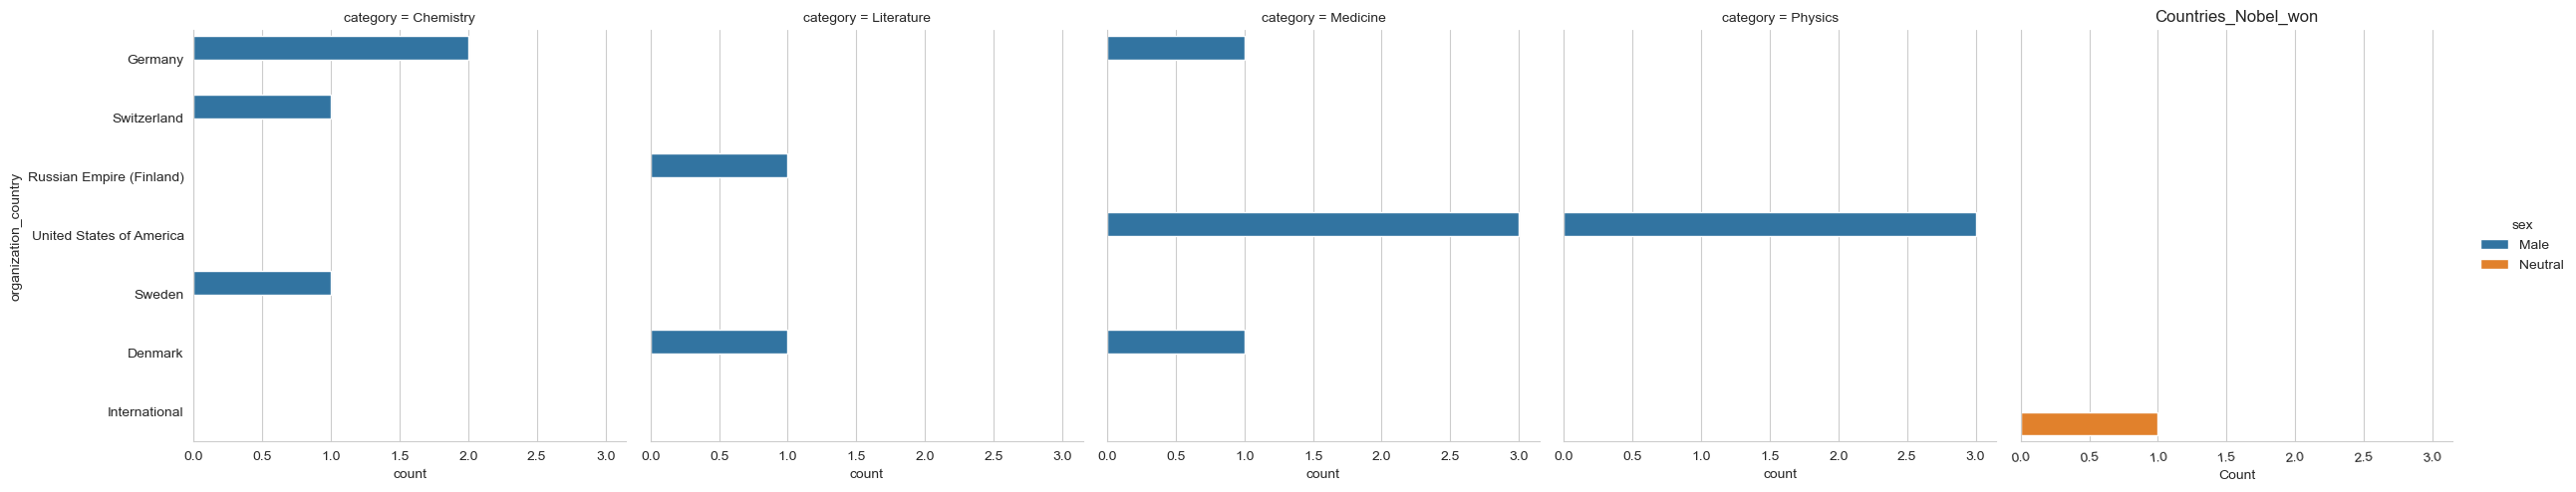

In [130]:
sns.catplot(kind="count", data=df1, y='organization_country',col='category',hue='sex')
plt.xticks(rotation=5)
plt.title('Countries_Nobel_won')
plt.xlabel('Count')
plt.ylabel('Country')

**Based on the available data, it is observed that Nobel Prizes in the fields of chemistry and medicine were predominantly awarded to scientists of American and German origin between 1938 and 1945. Let's examine the characteristics of this period and the data related to Nobel Prizes:**

#### The Period of 1938-1945 and Nobel Prizes:

1. **Awards in Chemistry and Medicine:**
   - During this period, Nobel Prizes in Chemistry and Medicine focused on significant discoveries and advancements in the field of science. Molecular structures and reactions in chemistry and diagnosis and treatment of diseases in medicine were highlighted.

2. **Countries of the Winners:**
   - The majority of scientists who won Nobel Prizes during this period were of American and German origin or born in these countries. Both the United States and Germany played leading roles in scientific research and development.

3. **Analysis:**
   - Scientists from Germany made significant discoveries, especially in the field of chemistry. Germany's chemical industry and research infrastructure laid the foundation for these scientific achievements.
   - The United States hosted leading scientists, particularly in the field of medicine. Medical research institutions and universities, in particular, played a significant role in winning Nobel Prizes.

4. **Examples:**
   - The 1943 Nobel Prize in Chemistry was awarded to George de Hevesy. Although de Hevesy was born in Hungary, he conducted his work in Denmark and later in the United States.
   - The 1944 Nobel Prize in Medicine was awarded to Joseph Erlanger and Herbert Spencer Gasser. Both were American physiologists honored for their work on nerve conduction.

5. **Total Numbers:**
   - A total of 16 Nobel Prizes were awarded during this period. The majority of these awards (13) were given in the fields of chemistry and medicine.
   - Nine of these awards were given to scientists born or working in the United States, while six were awarded to scientists born or working in Germany.

This analysis indicates a focus on scientists of American and German origin in the Nobel Prizes between 1938 and 1945. Scientific research and discoveries during this period were shaped significantly by the contributions of these two countries.

**The Period of 1938-1945 Coincides with World War II and Has Had a Significant Impact on the Awarding of Nobel Prizes and Scientific Research:**

1. **Impact of the War on the Scientific Community:**
   - World War II caused a significant disruption in the scientific community. Many scientists had to participate in war efforts or cope with the challenges posed by the war. This negatively affected the pace and scope of scientific research and discoveries. Additionally, many scientific resources and laboratories were damaged or diverted for war economies during the war.

2. **Years of Missing Nobel Prizes:**
   - Due to the impact of World War II, there were periods when Nobel Prizes were not awarded or were awarded in limited numbers. In particular, it is known that Nobel Prizes were not awarded in 1940, 1941, 1942, and 1943. This could be attributed to the effects of the war and the uncertainties experienced worldwide.

3. **Scientific Collaboration and Migration:**
   - During World War II, many scientists had to migrate between countries to escape the effects of the war or to cope with the challenges posed by the war. This migration wave affected scientific collaboration and knowledge sharing, allowing some scientists to make significant discoveries in their new countries.

This situation could be a factor behind the prominence of scientists of American and German origin in Nobel Prizes between 1938 and 1945. Both the United States and Germany had taken leading roles in scientific research and development before and during the war. Additionally, the absence or limited awarding of Nobel Prizes during the war period could be associated with the restriction of scientific discoveries and research. The Nobel Prizes during this period reflect the impact of the war and the scientific community's process of coping with the challenges of the war.


# Let's analyze the categories and countries of the Nobel Prize winners between 1947 and 1991

In [132]:
df_filtered = df[(df['year'].dt.year >= 1947) & (df['year'].dt.year <= 1991)]

In [133]:
top_countries = df_filtered['organization_country'].value_counts().nlargest(10).index

In [134]:
df_filtered = df_filtered[df_filtered['organization_country'].isin(top_countries)]

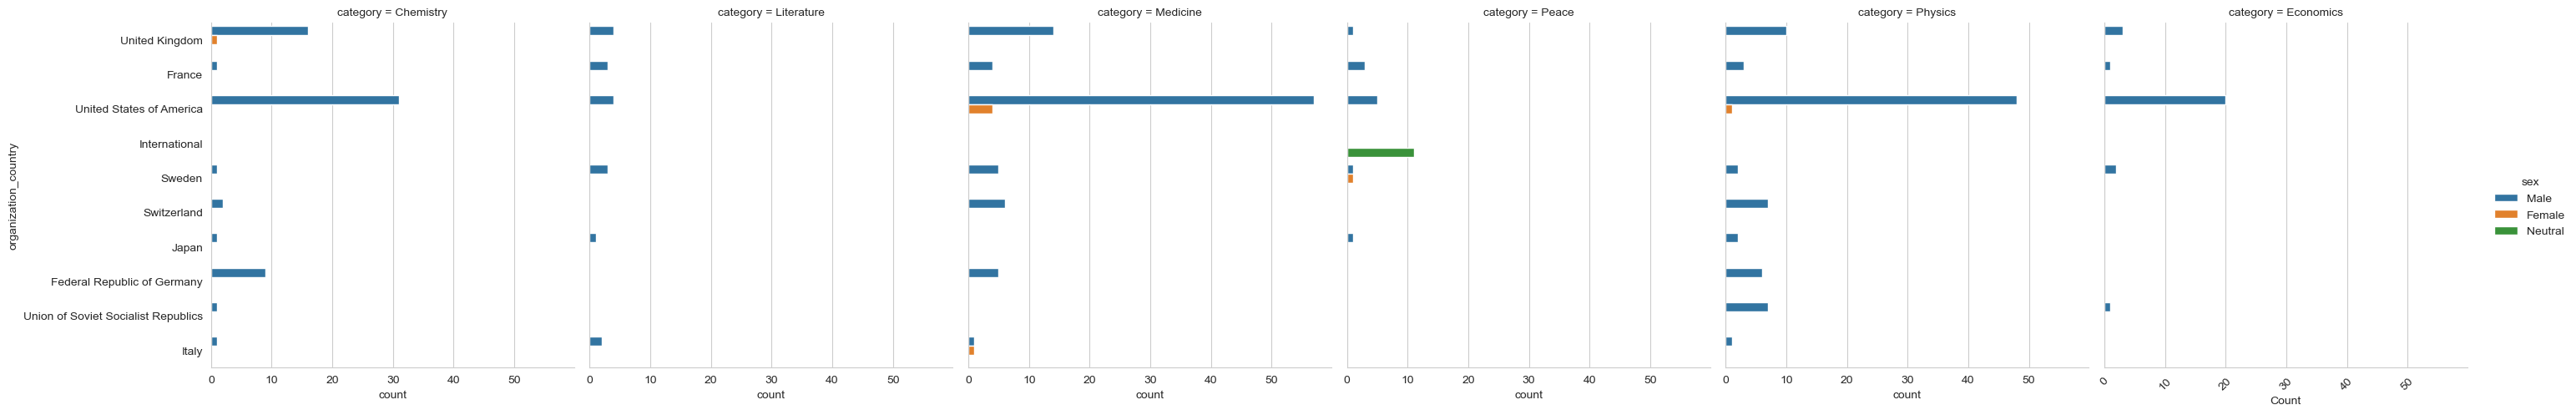

In [135]:
sns.catplot(kind="count",data=df_filtered, y='organization_country', col='category',hue='sex')
plt.xticks(rotation=45,)
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### The Cold War Era (1947-1991)

#### Nobel Prizes and Laureates:

1. **Chemistry Category:**
   - **USA:**
     - Linus Pauling (1954)
     - Melvin Calvin (1961)
     - Robert Burns Woodward (1965)
   - **United Kingdom:**
     - Derek Harold Richard Barton (1969)
     - John Cornforth (1975)
     - George Porter (1967)
   - **Germany:**
     - Adolf Butenandt (1939)
     - Ernst Otto Fischer (1973)
     - Hartmut Michel (1988)

2. **Physics Category:**
   - **USA:**
     - John Bardeen (1956, 1972)
     - Richard Feynman (1965)
     - William Shockley (1956)
   - **United Kingdom:**
     - Antony Hewish (1974)
     - Brian D. Josephson (1973)
     - Joseph Rotblat (1995)
   - **Germany:**
     - Max Born (1954)
     - Wolfgang Paul (1989)
     - Klaus von Klitzing (1985)

3. **Medicine or Physiology Category:**
   - **USA:**
     - George Wald (1967)
     - Albert Sabin (1954)
     - Michael Bishop (1989)
   - **United Kingdom:**
     - Howard Florey (1945)
     - James Black (1988)
     - César Milstein (1984)
   - **Germany:**
     - Adolf Butenandt (1939)
     - Werner Forssmann (1956)
     - Günter Blobel (1999)

#### Effects of the Cold War Era and Scientific Advancements:

- **Space Race and Technological Advancements:**
  - During the Cold War era, the space race between the USA and the Soviet Union led to significant advancements in space technologies. 
This period of space exploration resulted in major discoveries and Nobel Prizes in the field of physics.

- **Nuclear Physics and Energy Research:**
  - Nuclear physics and energy research gained momentum during the Cold War era. Progress in this area propelled both the United States and other countries towards Nobel Prize victories.

- **Scientific Collaborations and Diplomacy:**
  - Scientific collaborations during the Cold War era contributed to a thaw in international relations and increased understanding. These collaborations accelerated scientific discoveries and led to the distribution of Nobel Prizes among various countries.

#### Returns of Scientists and International Competition:

- During the Cold War era, there was limited tendency for scientists fleeing from other countries to return to Germany post-World War II. 
Most scientists preferred to stay in countries like the United States and the United Kingdom.

- **USA and United Kingdom:**
  - During the Cold War era, these countries emerged even stronger in science with the influx of scientists fleeing from other countries. For example, many German scientists sought refuge in the United States and the United Kingdom post-World War II and continued their work there. This bolstered the scientific prowess of these countries and contributed to winning Nobel Prizes.

Throughout the Cold War era, Nobel Prizes were distributed among various countries, but it can be said that the United States was the country with the highest number of Nobel Prize winners during this period.


# Let's analyze the countries and ages of individuals who won Nobel Prizes in the categories of Chemistry, Literature, Peace, Physics, and Medicine after 2000

In [138]:
df_q6=df.loc[(df['year'].dt.year>=2000) & (df['category'].isin(['Chemistry','Medicine','Literature','Peace','Physics'])),['year','age', 'organization_country', 'category']]

In [139]:
df_q6

,year,age,organization_country,category
706,2000-01-01,63.942505,United States of America,Chemistry
707,2000-01-01,72.717317,United States of America,Chemistry
708,2000-01-01,63.364819,Japan,Chemistry
711,2000-01-01,59.991786,China,Literature
712,2000-01-01,76.933607,Sweden,Medicine
...,...,...,...,...
906,2016-01-01,70.891170,Japan,Medicine
907,2016-01-01,64.394251,Colombia,Peace
908,2016-01-01,81.278576,United States of America,Physics
909,2016-01-01,64.298426,United States of America,Physics


<Figure size 1500x1500 with 0 Axes>

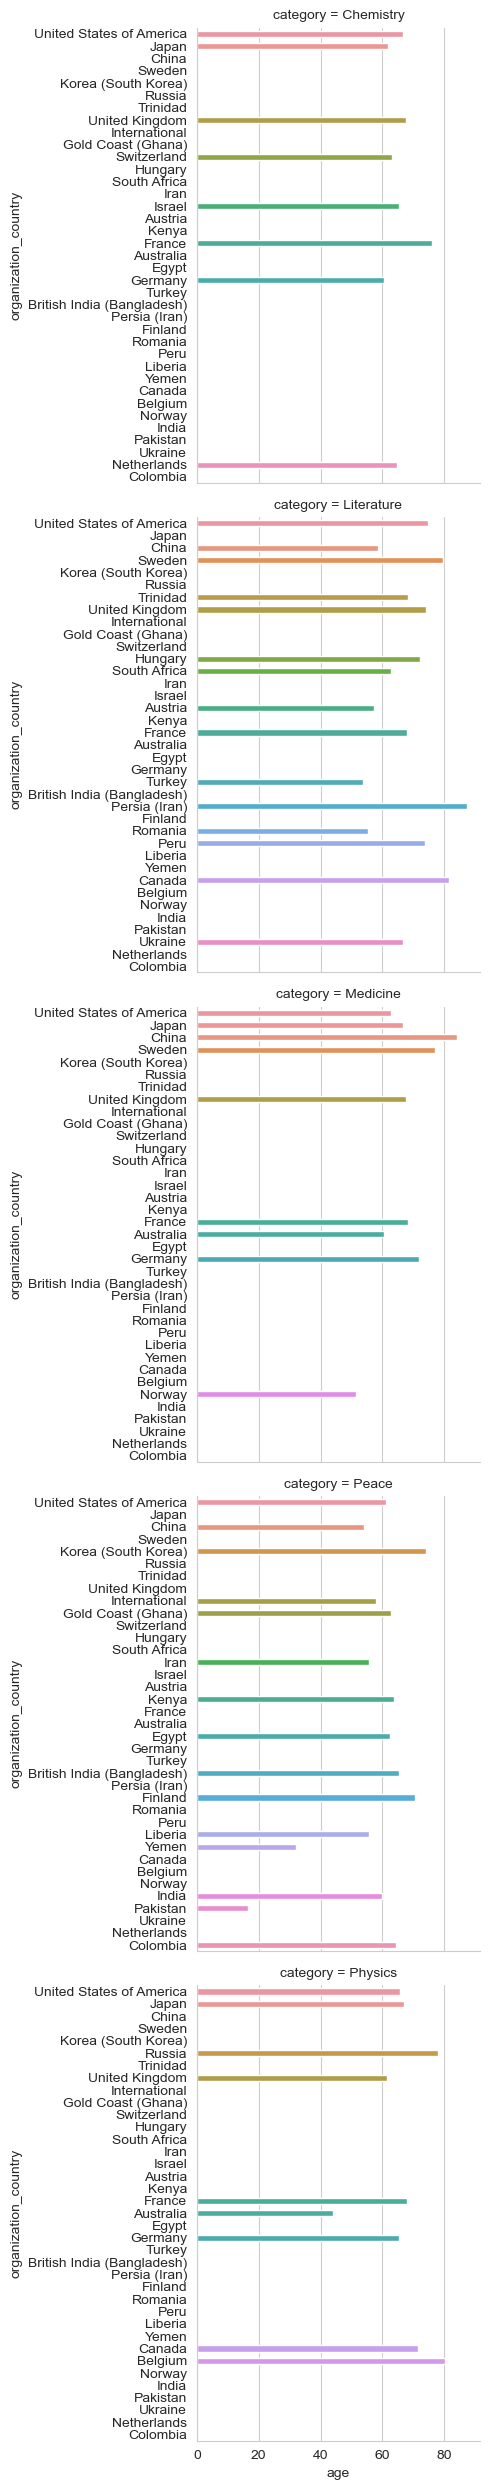

In [140]:
plt.figure(figsize=(15, 15))
sns.catplot(kind='bar',data=df_q6,y='organization_country',x='age',ci=None,width=0.5,row='category')

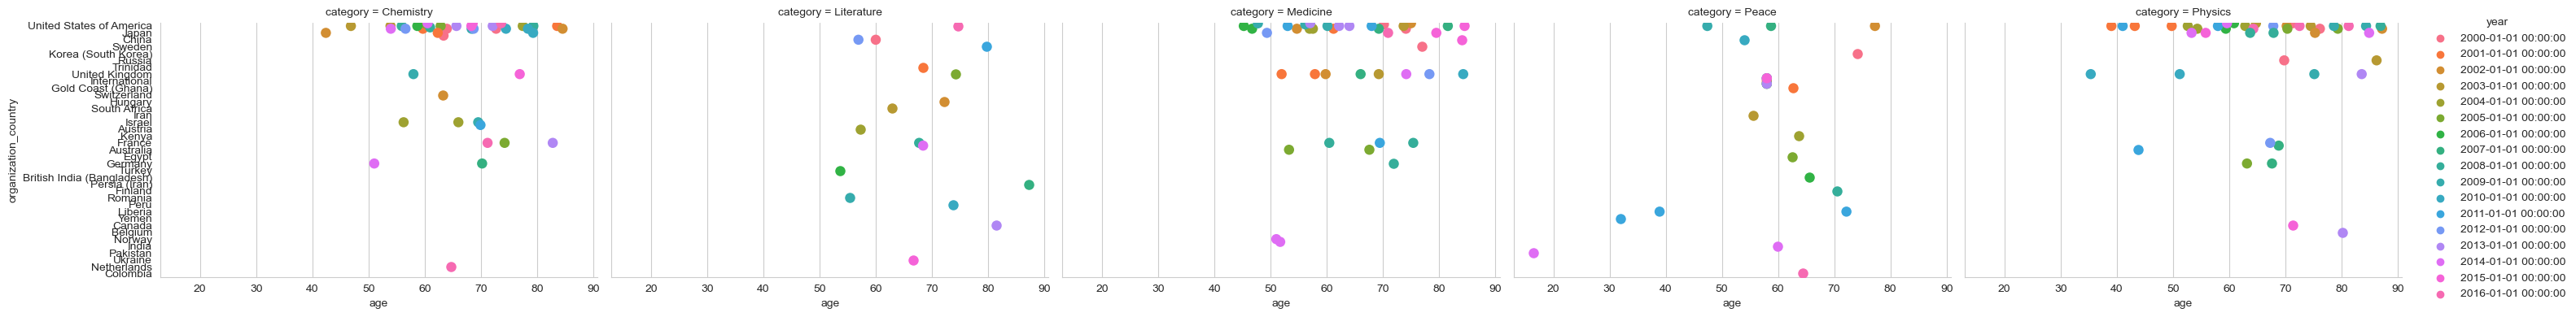

In [141]:
sns.catplot(kind='swarm', data=df_q6, y='organization_country', x='age', col='category', hue='year', height=4, aspect=1.5,size=9)

**United States** has been the most successful country in Chemistry Nobel Prizes post-2000.
**Japan** has shown significant activity in the Chemistry category in recent years, particularly in 2010 when the country 
won three Nobel Chemistry Prizes.
The average age of Nobel Chemistry Prize winners seems to have increased post-2000, with awards being predominantly given 
to older scientists.

In the **Literature category**, Nobel Prizes post-2000 have been distributed among various countries.
**France** and the **United Kingdom** have been prominent countries in the Literature Nobel Prizes during this period.
While there doesn't seem to be a significant increase in the average age, it's observed that most recipients are middle-aged
or older.

In the **Peace category**, Nobel Prizes post-2000 have been awarded to individuals from various countries and different age
groups.
**United States** stands out during this period, particularly with Barack Obama winning the Nobel Peace Prize in 2009.

The presence of individuals receiving the award at a young age emphasizes the diversity in the Peace category.


In [142]:
df4=df.query('year>=2000').groupby('organization_country').agg({'age':'mean'})
df4

,age
organization_country,
Australia,54.889345
Austria,57.199179
Belgium,80.153320
British India (Bangladesh),65.511294
Canada,76.412047
China,63.730322
Colombia,64.394251
Egypt,62.543463
Finland,70.524298


<Axes: xlabel='age', ylabel='organization_country'>

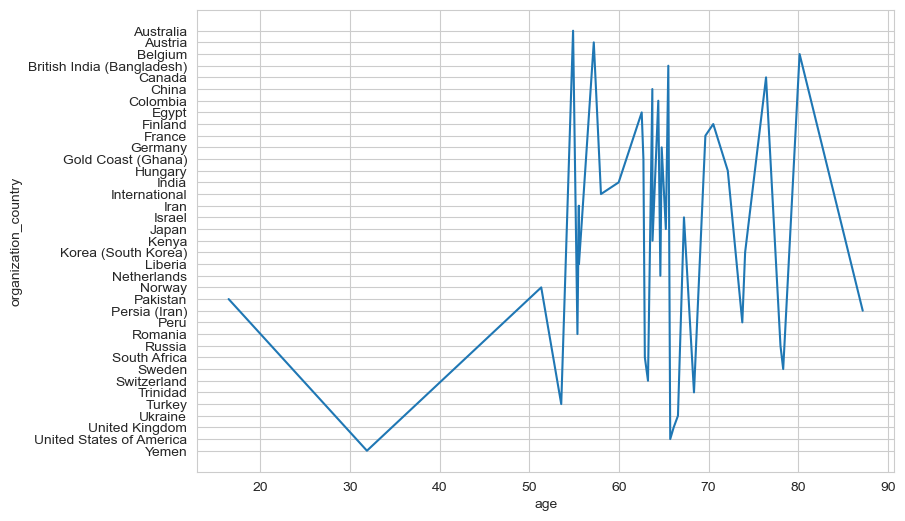

In [143]:
sns.set_style('whitegrid')
plt.figure(figsize=(9, 6)) 
sns.lineplot(data=df4,y='organization_country',x='age')